In [1]:
# %pip install xarray matplotlib pandas pyarrow pysciebo h5netcdf netCDF4 Seaborn

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Spike Time Analysis with Pandas and Matplotlib


In this notebook, we will be focusing on the spiking timing of neurons from the [Steinmetz et al, 2019 paper](https://www.nature.com/articles/s41586-019-1787-x). With the rich dataset that they collected during their experiments many analyses are possible that can link the timing of spikes to behavioral or experimental events.

##### Analysis Goals
We will visualize spiking events, examine their relationship with key experimental variables, and compare activity patterns across distinct brain regions.
##### Learning Goals
We will be using the Xarray Python package to load the data which is stored in netCDF format (i.e. `.nc` extension), as well as the [**Pandas**](https://pandas.pydata.org/) and  [**matplotlib**](https://matplotlib.org/) libraries for analysis and visualization.

---

### Download the dataset

In [2]:
# Add path with self-created packages and import them
import sys
sys.path.append('src')
import sciebo

sciebo.download_file('https://uni-bonn.sciebo.de/s/3Uf2gScrvuTPQhB', 'data/steinmetz_2017-01-08_Muller.nc')

### Load the dataset using Xarray

In [3]:
dset = xr.load_dataset('data/steinmetz_2017-01-08_Muller.nc')
dset

<xarray.Dataset> Size: 124MB
Dimensions:             (trial: 261, time: 250, cell: 1268,
                         waveform_component: 3, sample: 82, probe: 384,
                         brain_area_lfp: 5, spike_id: 1836009)
Coordinates:
  * trial               (trial) int32 1kB 1 2 3 4 5 6 ... 257 258 259 260 261
  * time                (time) float64 2kB 0.01 0.02 0.03 0.04 ... 2.48 2.49 2.5
  * cell                (cell) int32 5kB 1 2 3 4 5 ... 1264 1265 1266 1267 1268
  * waveform_component  (waveform_component) int32 12B 1 2 3
  * probe               (probe) int32 2kB 1 2 3 4 5 6 ... 380 381 382 383 384
  * brain_area_lfp      (brain_area_lfp) <U5 100B 'CA1' 'DG' 'LP' 'PO' 'VISam'
  * spike_id            (spike_id) int32 7MB 1 2 3 4 ... 1836007 1836008 1836009
Dimensions without coordinates: sample
Data variables: (12/31)
    contrast_left       (trial) int8 261B 50 0 100 0 50 0 ... 100 0 100 0 100 0
    contrast_right      (trial) int8 261B 0 50 25 100 50 50 ... 100 50 100 25 25
    gocue               (trial) float64 2kB 0.9828 0.902 1.114 ... nan nan nan
    stim_onset          (trial) float64 2kB 0.5 0.5 0.5 0.5 ... 0.5 0.5 0.5 0.5
    feedback_type       (trial) float64 2kB 1.0 1.0 1.0 1.0 ... nan nan nan nan
    feedback_time       (trial) float64 2kB 1.272 1.104 1.402 ... nan nan nan
    ...                  ...
    waveform_w          (cell, sample, waveform_component) float32 1MB 0.0 .....
    waveform_u          (cell, waveform_component, probe) float32 6MB 0.0 ......
    lfp                 (brain_area_lfp, trial, time) float64 3MB -27.6 ... 0...
    spike_time          (spike_id) float32 7MB 2.363 2.385 ... 1.651 0.5142
    spike_cell          (spike_id) uint32 7MB 1 1 1 1 1 ... 1268 1268 1268 1268
    spike_trial         (spike_id) uint32 7MB 1 1 2 2 2 ... 205 205 205 213 252
Attributes:
    session_date:  2017-01-08
    mouse:         Muller
    stim_onset:    0.5
    bin_size:      0.01

---

### Spike Timing Data as Pandas DataFrame

In this section we'll load the spike timing data as a Pandas DataFrame and explore some of the properties of the data to get a better understanding of it. As you will see later, each spike is characterised by 4 pieces of information:
* `spike_id`: The identifier for that spike
* `spike_time`: The time at which the spike occurred
* `spike_cell`: The cell to which the spike belongs
* `spike_trial`: The trial in which the spike occurred

<br>


| Command                                    | Description                                                                                           |
|--------------------------------------------|-------------------------------------------------------------------------------------------------------|
| `df[df['column_B'] == 42]`                 | Filter a DataFrame where the values of `column_B` are 42.                                             |
| `df['column_A'].nunique()`                 | Count the number of unique values in `column_A` of a DataFrame.                                       |
| `df.groupby('column_B')['column_A'].nunique()` | Group a DataFrame according to values of `column_B` and count the number of unique values in `column_A`. |
| `df.max()`                                 | Find the maximum value of a DataFrame.                                                                |
| `df.idxmax()`                              | Find the index where the maximum value occurs in a DataFrame.                                         |
| `df.idxmin()`                              | Find the index where the minimum value occurs in a DataFrame.                                         |
| `plt.hist(data_values)`                    | Plot a histogram of `data_values` using Matplotlib.                                                   |



Make a DataFrame with spiking data (`"spike_time"`, `"spike_cell"`, `"spike_trial"`)

In [4]:
spike_cols = ['spike_time', 'spike_cell', 'spike_trial']
df = dset[spike_cols].to_dataframe().reset_index()
df.head()

,spike_id,spike_time,spike_cell,spike_trial
0,1,2.362881,1,1
1,2,2.384915,1,1
2,3,1.450718,1,2
3,4,1.459585,1,2
4,5,1.963452,1,2


In [5]:
df

,spike_id,spike_time,spike_cell,spike_trial
0,1,2.362881,1,1
1,2,2.384915,1,1
2,3,1.450718,1,2
3,4,1.459585,1,2
4,5,1.963452,1,2
...,...,...,...,...
1836004,1836005,2.240762,1268,205
1836005,1836006,2.268195,1268,205
1836006,1836007,2.401162,1268,205
1836007,1836008,1.650607,1268,213


**Example**: How many cells spiked during trial 1?

In [6]:
df[df['spike_trial'] == 1]['spike_cell'].nunique()

860

How many cells spiked during trial 24?

How many cells spiked during the last trial?

How many cells spiked in each trial. **Hint** - use `df.groupby('spike_trial')`

What was the maximum number cells that spiked in a single trial?

Which trial had the most spiking cells?

Find the trial number and the spike count where the fewest number of cells spiked

**Example**: Use the `plt.hist()` function to plot a histogram of the number of cells that spiked, across all trials.

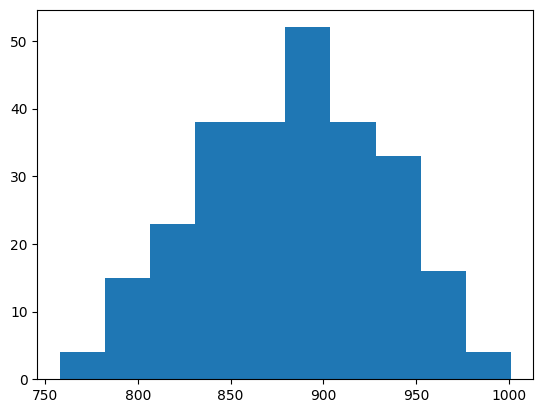

In [13]:
n_spiking_cells = df.groupby(by='spike_trial')['spike_cell'].nunique()
plt.hist(n_spiking_cells);

Use the `plt.hist()` function to plot a histogram of the number of cells that spiked, across all trials. Make the histogram with the following features:
- color: black

Use the `plt.hist()` function to plot a histogram of the number of cells that spiked, across all trials. Make the histogram with the following features:
- color: black
- histtype: "step"

Use the `plt.hist()` function to plot a histogram of the number of cells that spiked, across all trials. Make the histogram with the following features:
- color: black
- histtype: "step"
- linewidth: 3

---


## Visualize the spiking activity using spike times

Now we'll focus on visualizing the spike timing data, and some of their properties, using matplotlib:

| Command                          | Description                                                        |
|----------------------------------|--------------------------------------------------------------------|
| `plt.scatter(x, y)`              | Create a scatter plot of `x` vs `y`. `x` and `y` are both 1D arrays. |
| `plt.xlabel("your_text")`        | Label the x-axis of the plot with specified text.                  |
| `plt.ylabel("your_text")`        | Label the y-axis of the plot with specified text.                  |
| `plt.title("your_text")`         | Add a title to the plot with the specified text.                   |



**Example**: Create a scatter plot to visualize spikes for a single neuron across multiple trials.

In [17]:
spike_cols = ['spike_time', 'spike_cell', 'spike_trial']
df = dset[spike_cols].to_dataframe().reset_index()

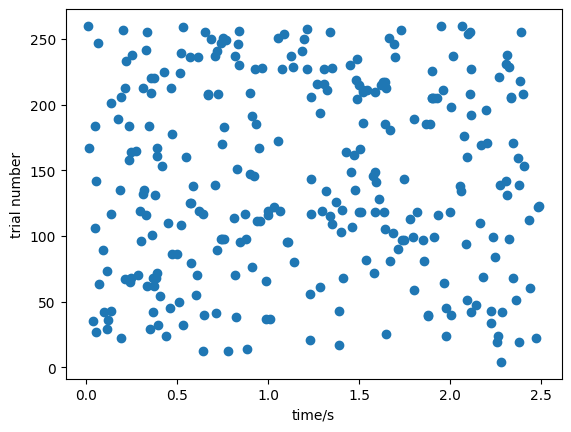

In [18]:
dd = df[df['spike_cell'] == 12]
plt.scatter(dd['spike_time'], dd['spike_trial'])
plt.xlabel('time/s')
plt.ylabel('trial number');

Create a scatter plot to visualize spikes for a neuron number 11 across multiple trials.

Wow, that plot looks crowded! 

To help with this, instead of a dot let's use `|` as marker. This can be done by simply setting the `marker = '|'` in the `plt.scatter()` function.

This might still look a bit crowded. Let's improve it further by setting the size of the marker to a smaller value. You can use `s` which is an argument of the `plt.scatter()` to specify the size (`s = some number` inside plt.scatter()).

Create a scatter plot to visualize spikes for **all neurons** in **trial 83**.

Visualize spikes for all neurons in trial 83 using a scatter plot with the following features:
- color: "black"

Color can be specified using the `c` argument.

Visualize spikes for all neurons in trial 83 using a scatter plot with the following features:
- color: depends on the value of `spike_time`

**hint**: `c=dd['spike_time']`

Visualize spikes for all neurons in trial 83 using a scatter plot with the following features:
- color: depends on the value of `spike_cell`

## Demo: Raster plot with spikes from multiple brain areas

Below are two examples of how you can make a raster plot with spikes from different brain areas.

In [26]:
spike_cols = ['spike_time', 'spike_cell', 'spike_trial']
df = dset[spike_cols].to_dataframe().reset_index()

brain_region_df = dset["brain_area"].to_dataframe().reset_index()

spike_region_df = pd.merge(df, brain_region_df, left_on='spike_cell', right_on='cell')
spike_region_df

,spike_id,spike_time,spike_cell,spike_trial,cell,brain_area
0,1,2.362881,1,1,1,PO
1,2,2.384915,1,1,1,PO
2,3,1.450718,1,2,1,PO
3,4,1.459585,1,2,1,PO
4,5,1.963452,1,2,1,PO
...,...,...,...,...,...,...
1836004,1836005,2.240762,1268,205,1268,root
1836005,1836006,2.268195,1268,205,1268,root
1836006,1836007,2.401162,1268,205,1268,root
1836007,1836008,1.650607,1268,213,1268,root


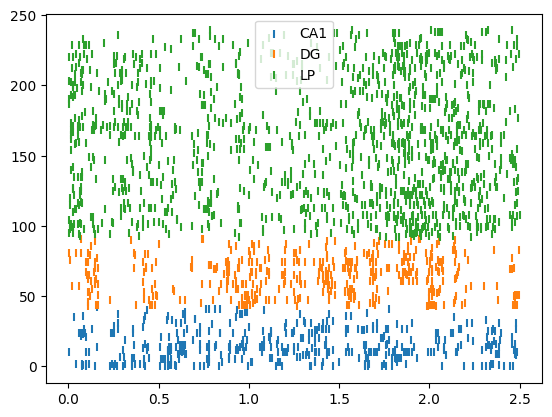

In [27]:
dd = spike_region_df[spike_region_df["spike_trial"] == 187]
dd = dd.sort_values(by="brain_area")
dd["ordered_index"] = dd.spike_cell.factorize()[0]

area = "CA1"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index,  marker='|', label=area)

area = "DG"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', label=area)

area = "LP"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', label=area)

plt.legend();

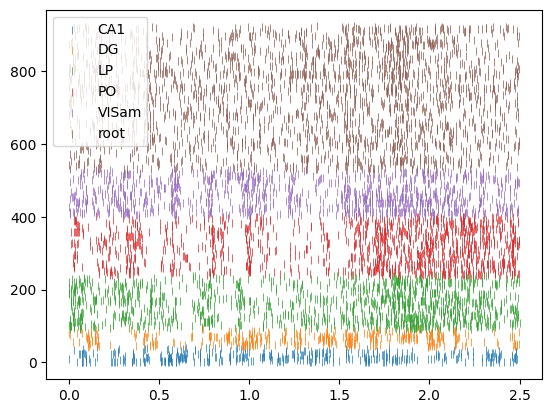

In [28]:
dd = spike_region_df[spike_region_df["spike_trial"] == 187]
dd = dd.sort_values(by="brain_area")
dd["ordered_index"] = dd.spike_cell.factorize()[0]

area = "CA1"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index,  marker='|', linewidths=0.5, label=area)

area = "DG"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

area = "LP"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index , marker='|', linewidths=0.5, label=area)

area = "PO"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

area = "VISam"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

area = "root"
dd_area = dd[dd["brain_area"] == area]
plt.scatter(dd_area.spike_time, dd_area.ordered_index, marker='|', linewidths=0.5, label=area)

plt.legend();

### Visualize the spiking activity with firing rate plots

Raster plots are a great way to visualize spiking activity of many cells together or single cells over many trials. But often it's also a good idea to show the average activity of a whole population of cells and/or the average activity across trials. To do that, we calculate and plot the firing rate. Below, you will use the `groupby` function in Pandas and the plotting functions in Matplotlib to display the firing rate and adapt the plots.

**Exercise**: Make a DataFrame with `spike rate` data using the same kind of syntax as before.

In [29]:
spike_cols = ['spike_rate'] # give them this part
df = dset[spike_cols].to_dataframe().reset_index()
df

,cell,trial,time,spike_rate
0,1,1,0.01,0
1,1,1,0.02,0
2,1,1,0.03,0
3,1,1,0.04,0
4,1,1,0.05,0
...,...,...,...,...
82736995,1268,261,2.46,0
82736996,1268,261,2.47,0
82736997,1268,261,2.48,0
82736998,1268,261,2.49,0


**Example**: Get firing rate over time in trial number 187 averaged across all cells and plot the firing rate.

In [30]:
dd = df[df['trial'] == 187]
rate_series = dd.groupby('time')['spike_rate'].mean()
rate_series


time
0.01    0.027603
0.02    0.018927
0.03    0.031546
0.04    0.021293
0.05    0.018927
          ...   
2.46    0.019716
2.47    0.026025
2.48    0.032334
2.49    0.029180
2.50    0.020505
Name: spike_rate, Length: 250, dtype: float64

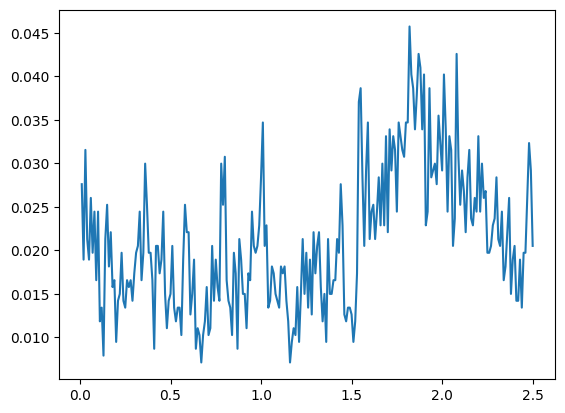

In [31]:
time = rate_series.keys()
rate = rate_series.values
plt.plot(time, rate);

**Exercise**: Get average firing rate **across trials** in for cell number 4 and plot the firing rate

**Exercise**: Now let's compare the firing rates of two different cells. Make a figure that shows the firing rate over time averaged across trials for cell number 4 and cell number 10 together in the same plot.

It's best if the person viewing the plot can immediately see which firing rate belongs to which cell without having to read the code. To show that, we add the parameter `label` to the plot function and add the line `plt.legend()` in the code to tell Python to display the labels.

**Example**: Plot the firing rate for cell number 4 and make a legend where the cell number is labeled.

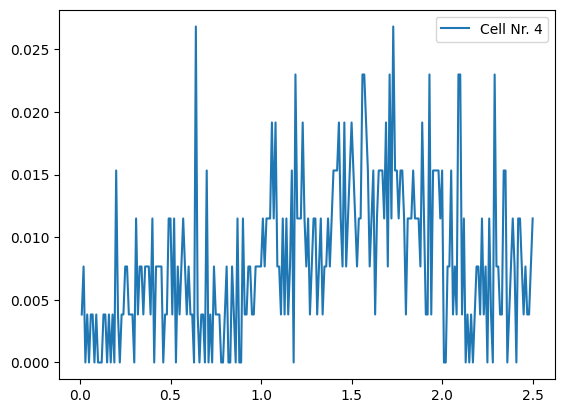

In [35]:
cell_nr = 4

dd = df[df['cell'] == cell_nr]
rate_series = dd.groupby('time')['spike_rate'].mean()

time = rate_series.keys()
rate = rate_series.values
plt.plot(time, rate, label = 'Cell Nr. '+ str(cell_nr))

plt.legend();

**Exercise**: Make the plot showing firing rates over time for both cell nr. 4 and cell nr. 10 again, but this time display labels for both cells. (Tip: you only need to use the `plt.legend()` function once to make the legend, even though you have multiple labels.)

**Exercise**: Make the plot with the firing rate over time for cell number 4 and 10 again, but this time put labels on the x- and y-axis and add a title to the plot. Remember to include the unit in the label. 

(**Hint:** The rate is typically given in Hz or spikes per second, but since the time bins are 0.01 seconds, it's currently given in spikes per 1/100th of a second. To get it in spikes/second, simply multiply the rate with 100 before plotting (it can also be done inside the plot function if you don't want to change the scale of the variable).)

Make the same plot with trial averaged firing rates over time for cell number 4 and 10, but change the color of the line for each cell to one of your choosing.

---